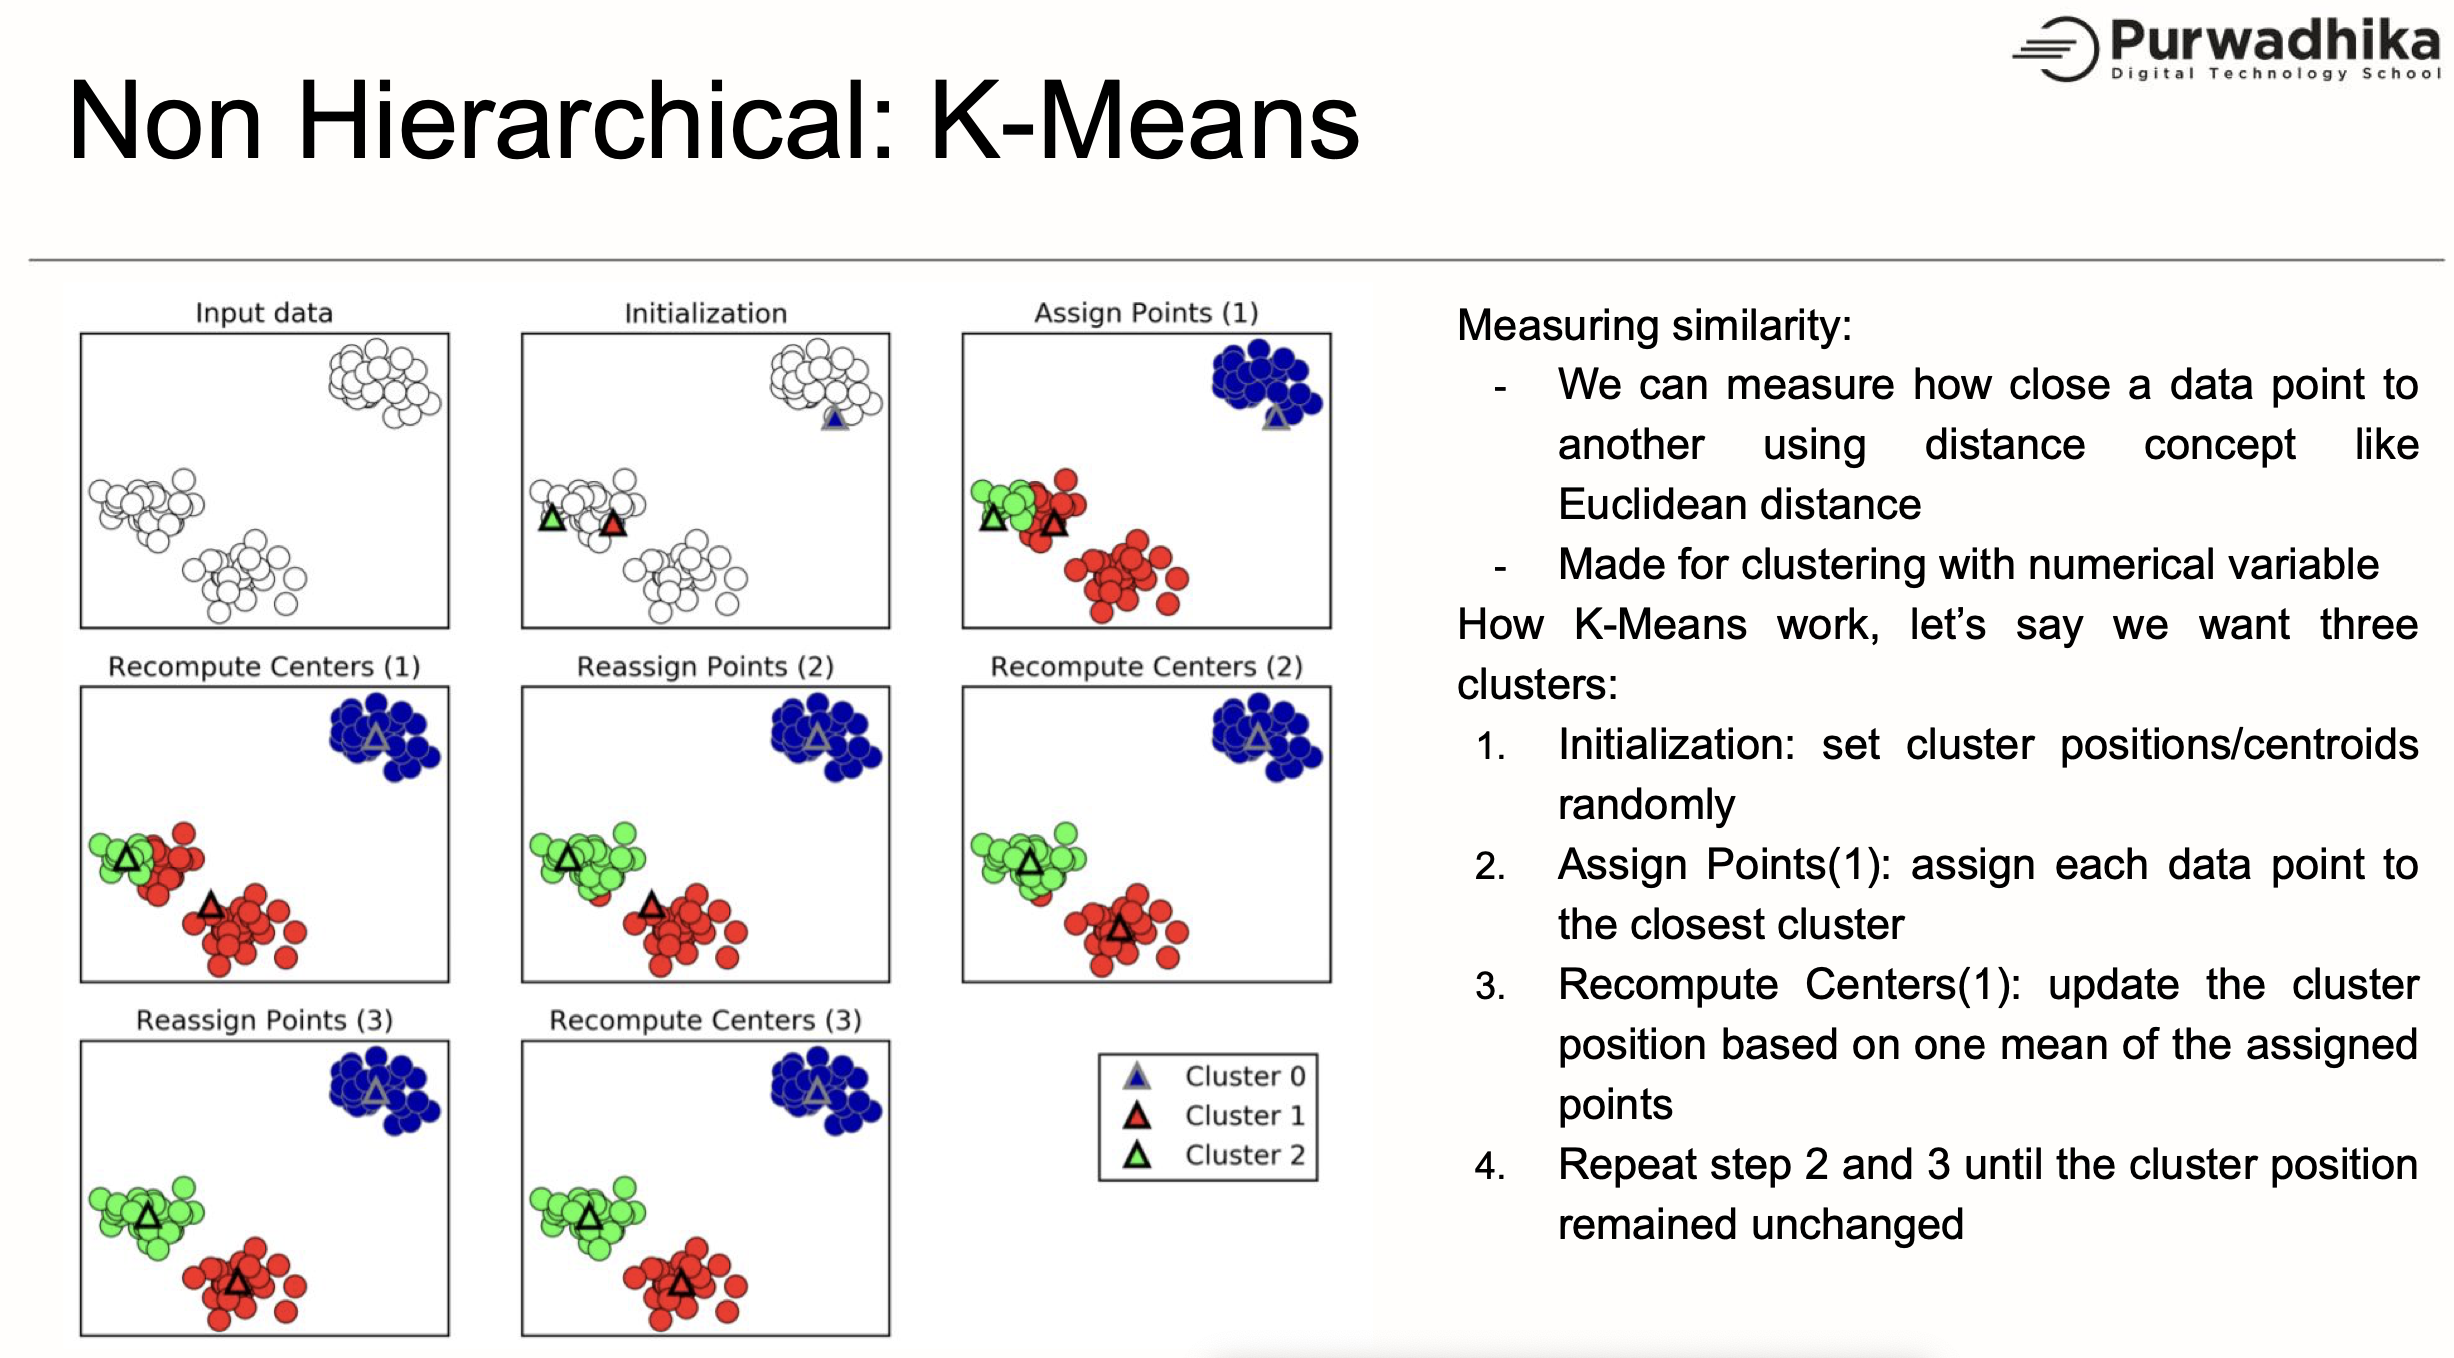

• Generate data using make_blobs with random_state = 42

• Plot the data using scatter plot

• Fit k-means method (3 clusters)

• Plot the data and clustering result using scatter plot

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans


from sklearn.metrics import silhouette_score, accuracy_score, classification_report

## Generate Data

In [2]:
X,y=make_blobs(random_state=42)

In [3]:
X=pd.DataFrame(X).rename(columns={0:'Feature 1',1:'Feature 2'})
X

,Feature 1,Feature 2
0,-7.726421,-8.394957
1,5.453396,0.742305
2,-2.978672,9.556846
3,6.042673,0.571319
4,-6.521840,-6.319325
...,...,...
95,-3.186120,9.625962
96,-1.478198,9.945566
97,4.478593,2.377221
98,-5.796576,-5.826308


In [4]:
y=pd.DataFrame(y).rename(columns={0:'Label'})
y

,Label
0,2
1,1
2,0
3,1
4,2
...,...
95,0
96,0
97,1
98,2


In [5]:
df_cluster=pd.concat([X,y],axis=1)
df_cluster

,Feature 1,Feature 2,Label
0,-7.726421,-8.394957,2
1,5.453396,0.742305,1
2,-2.978672,9.556846,0
3,6.042673,0.571319,1
4,-6.521840,-6.319325,2
...,...,...,...
95,-3.186120,9.625962,0
96,-1.478198,9.945566,0
97,4.478593,2.377221,1
98,-5.796576,-5.826308,2


## Scatter Plot


<Axes: xlabel='Feature 1', ylabel='Feature 2'>

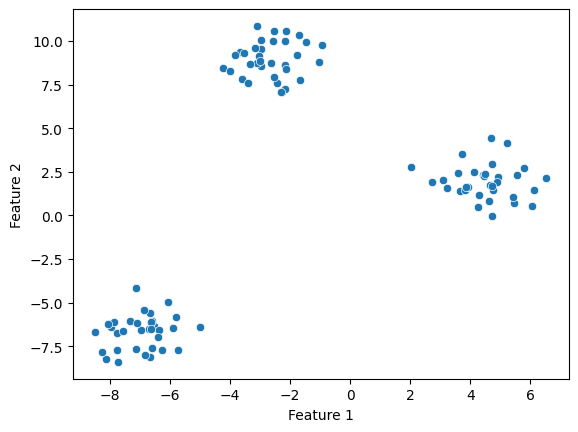

In [6]:
sns.scatterplot(data=df_cluster,x='Feature 1', y='Feature 2')

# K-Means

fit K-means with 3 cluster

In [7]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

### Result

In [8]:
kmeans.labels_

array([1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2,
       2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2], dtype=int32)

In [9]:
kmeans.cluster_centers_

array([[ 4.49951001,  1.93892013],
       [-6.95170962, -6.67621669],
       [-2.66780392,  8.93576069]])

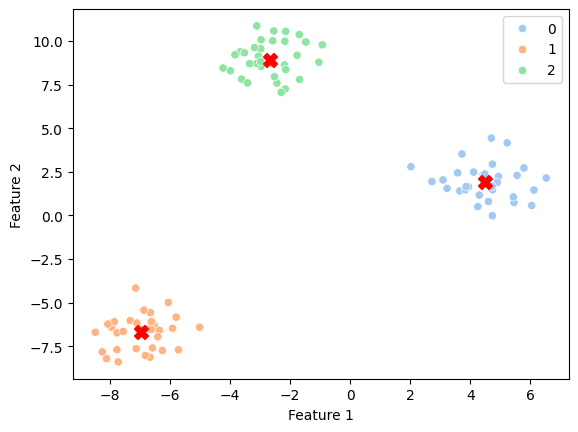

In [10]:
sns.scatterplot(data=df_cluster,x='Feature 1', y='Feature 2',hue=kmeans.labels_,palette='pastel')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,marker='X',color='Red') #final centroid

## Elbow Method

In [11]:
#elbow score
kmeans.inertia_

171.91098459057724

In [12]:
inertia=[]
number_of_clusters=range(1,11)

for i in number_of_clusters:
    kmeans=KMeans(n_clusters=i,random_state=True)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

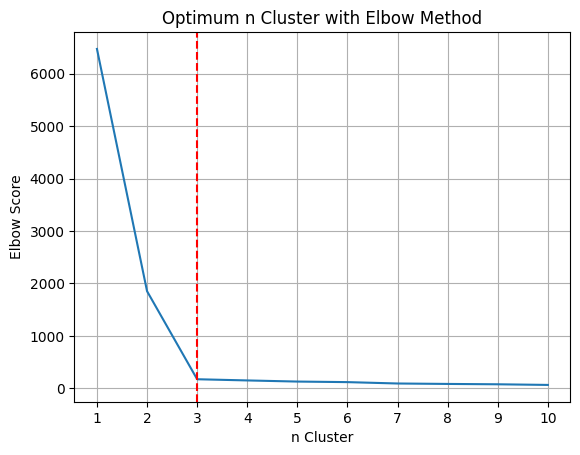

In [13]:
sns.lineplot(x=number_of_clusters,y=inertia)
plt.axvline(x=3,linestyle='--',color='red')
plt.xticks(number_of_clusters)
plt.grid()
plt.title('Optimum n Cluster with Elbow Method')
plt.xlabel('n Cluster')
plt.ylabel('Elbow Score')
plt.show()

## Silhouettte Method

In [14]:
#elbow score
silhouette_score(X,kmeans.predict(X))

0.35783143295607883

In [15]:
silhouette=[]
number_of_clusters=range(2,11)

for i in number_of_clusters:
    kmeans=KMeans(n_clusters=i,random_state=True)
    kmeans.fit(X)
    silhouette.append(silhouette_score(X,kmeans.predict(X)))

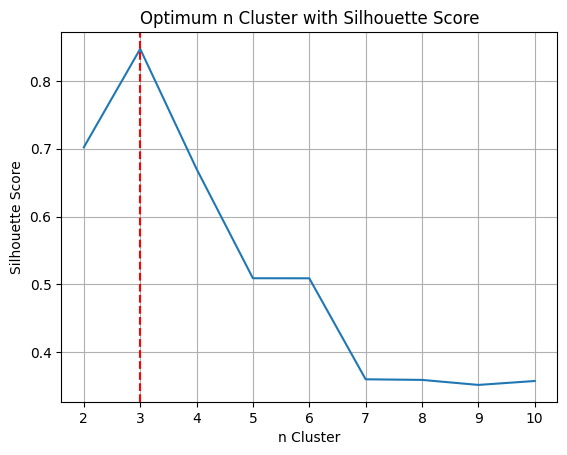

In [16]:
sns.lineplot(x=number_of_clusters,y=silhouette)
plt.axvline(x=3,linestyle='--',color='red')
plt.xticks(number_of_clusters)
plt.grid()
plt.title('Optimum n Cluster with Silhouette Score')
plt.xlabel('n Cluster')
plt.ylabel('Silhouette Score')
plt.show()

## Clustering Model Accuracy Check

In [17]:
kmeans=KMeans(n_clusters=3,random_state=True)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=True)

In [18]:
df_cluster['Predict']=kmeans.labels_
df_cluster

,Feature 1,Feature 2,Label,Predict
0,-7.726421,-8.394957,2,1
1,5.453396,0.742305,1,2
2,-2.978672,9.556846,0,0
3,6.042673,0.571319,1,2
4,-6.521840,-6.319325,2,1
...,...,...,...,...
95,-3.186120,9.625962,0,0
96,-1.478198,9.945566,0,0
97,4.478593,2.377221,1,2
98,-5.796576,-5.826308,2,1


In [19]:
import warnings
warnings.filterwarnings('ignore')

df_cluster['Predict'].replace({2:1,1:2},inplace=True)

df_cluster[['Label','Predict']].value_counts()

Label  Predict
0      0          34
1      1          33
2      2          33
Name: count, dtype: int64

## Accuracy

In [20]:
accuracy_score(df_cluster['Label'],df_cluster['Predict'])

1.0

In [21]:
print(classification_report(df_cluster['Label'],df_cluster['Predict']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        33

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [ ]:
## Soal 1
- Buat kmeans clustering menggunakan data penguins dengan 2 dari 4 fitur (bill length, bill depth,flipper length, body mass)
- Tentukan 2 fitur terbaik tersebut menggunakan silhoutte score untuk memprediksi species
- Hitung akurasinya (random state = 1)

(yang di ss : scatter plot fitur terbaik,scatter plot actual, classification report)

### Soal Penguins

In [26]:
df=sns.load_dataset('penguins').dropna()
X=df[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']]
y=df['species']

### std scaler

In [27]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled)
X_scaled.columns=scaler.get_feature_names_out()
X_scaled

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.896042,0.780732,-1.426752,-0.568475
1,-0.822788,0.119584,-1.069474,-0.506286
2,-0.676280,0.424729,-0.426373,-1.190361
3,-1.335566,1.085877,-0.569284,-0.941606
4,-0.859415,1.747026,-0.783651,-0.692852
...,...,...,...,...
328,0.587352,-1.762145,0.931283,0.892957
329,0.514098,-1.457000,1.002739,0.799674
330,1.173384,-0.744994,1.502928,1.919069
331,0.221082,-1.202712,0.788372,1.234995


In [41]:
from itertools import combinations

list_column=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
silhouette=[]
for i in combinations(list_column,2):
    i=list(i)
    kmeans=KMeans(n_clusters=3,random_state=True)
    kmeans.fit(X_scaled[i])
    silhouette.append(silhouette_score(X_scaled[i],kmeans.predict(X_scaled[i])))
    
pd.DataFrame({'feature':combinations(list_column,2),'silhouette score':silhouette})

,feature,silhouette score
0,"(bill_length_mm, bill_depth_mm)",0.333111
1,"(bill_length_mm, flipper_length_mm)",0.518869
2,"(bill_length_mm, body_mass_g)",0.471096
3,"(bill_depth_mm, flipper_length_mm)",0.497269
4,"(bill_depth_mm, body_mass_g)",0.496408
5,"(flipper_length_mm, body_mass_g)",0.464047


In [28]:
X_scaled.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

## Actual vs K-Means (bill_depth_mm, body_mass_g)

In [46]:
kmeans=KMeans(n_clusters=3,random_state=True)
kmeans.fit(X_scaled[['bill_length_mm', 'flipper_length_mm']])

KMeans(n_clusters=3, random_state=True)

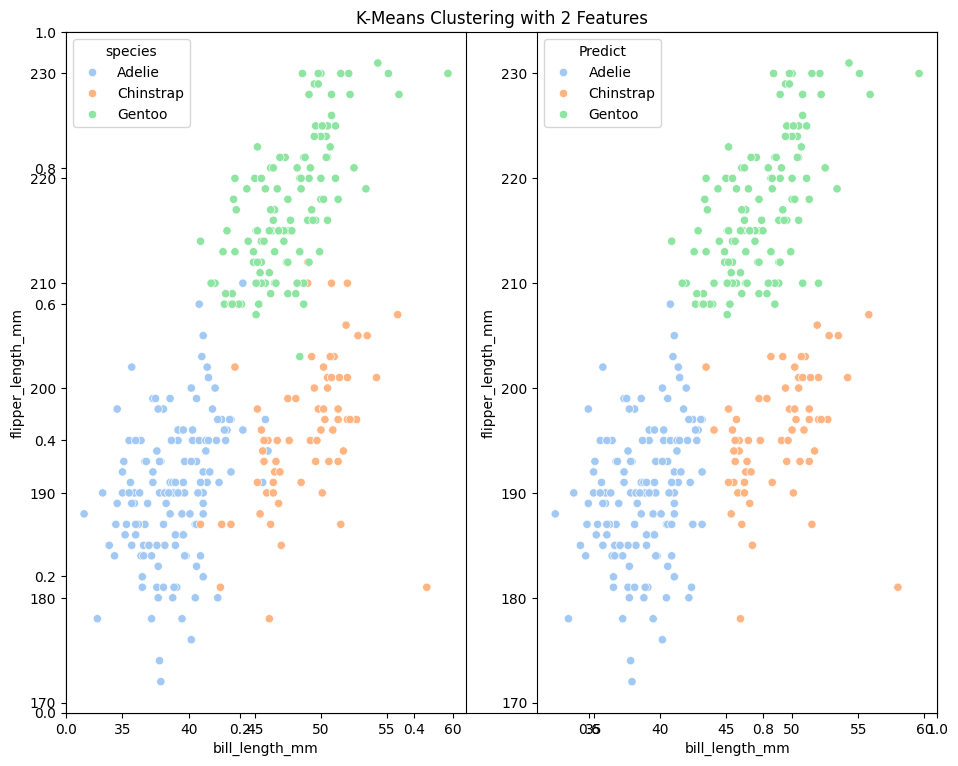

In [56]:
df['Predict']=kmeans.predict(X_scaled[['bill_length_mm', 'flipper_length_mm']])
df['Predict'].replace({0:'Adelie',1:'Gentoo',2:'Chinstrap'},inplace=True)

plt.figure(figsize=(10,8))
plt.title('K-Means Clustering with 2 Features')
plt.subplot(1,2,1)
sns.scatterplot(x=df['bill_length_mm'],y=df['flipper_length_mm'],hue=df['species'],palette='pastel')

plt.subplot(1,2,2)
sns.scatterplot(x=df['bill_length_mm'],y=df['flipper_length_mm'],hue=df['Predict'],palette='pastel')
plt.tight_layout()
plt.show()

In [53]:
print(classification_report(df['species'],df['Predict']))

              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97       146
   Chinstrap       0.92      0.87      0.89        68
      Gentoo       0.96      0.99      0.98       119

    accuracy                           0.95       333
   macro avg       0.95      0.94      0.94       333
weighted avg       0.95      0.95      0.95       333

